#Import Libraries

In [107]:
import numpy as np 
import pandas as pd
import tensorflow.keras
from sklearn.preprocessing import LabelBinarizer
import matplotlib.pyplot as plt
%matplotlib inline
from keras.callbacks import ModelCheckpoint
import tensorflow as tf





In [108]:
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from tensorflow.keras.utils import to_categorical
from keras import backend as K

#Loading ,Splitting and Data Visualization




(60000, 28, 28)
(60000,)
(60000, 28, 28)
(60000,)
(60000, 28, 28) (60000,)


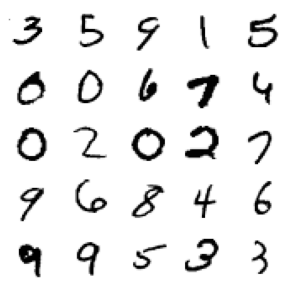

In [109]:
batch_size = 64
num_classes = 10
epochs = 30

#input image dimensions
img_rows, img_cols = 28, 28

#the data, shuffled and split between train and test sets
(Train_x,Train_y ), (Test_x,Test_y) = mnist.load_data()

print(str(Train_x.shape))
print(str(Train_y.shape))
print(str(Train_x.shape))
print(str(Train_y.shape))

if K.image_data_format() == 'channels_first':
   Train_x = Train_x.reshape(Train_x.shape[0], 1, img_rows, img_cols)
   Test_x = Test_x.reshape(Test_x.shape[0], 1, img_rows, img_cols)
   input_shape = (img_rows, img_cols)
else:
    Train_x = Train_x.reshape(Train_x.shape[0], img_rows, img_cols)
    Test_x = Test_x.reshape(  Test_x.shape[0], img_rows, img_cols)
    input_shape = (img_rows, img_cols)




# normalize x
Train_x = Train_x.astype(float) / 255.
Test_x = Test_x.astype(float) / 255.
#Printing dimensions
print(Train_x.shape, Train_y.shape)
Train_x,Train_y=Train_x[:10000]/255.0,Train_y[:10000]
image_size = Train_x.shape[1]
input_size = image_size * image_size
input_size
#Train_x = np.reshape(Train_x, [-1, input_size])
#Test_x = np.reshape(Test_x, [-1, input_size])

indexes = np.random.randint(0, Train_x.shape[0], size=25)
images = Train_x[indexes]
labels = Train_y[indexes]


# plot the 25 mnist digits
plt.figure(figsize=(5,5))
for i in range(len(indexes)):
    plt.subplot(5, 5, i + 1)
    image = images[i]
    plt.imshow(image, cmap='Greys')
    plt.axis('off')
    
plt.show()
plt.savefig("MNIST.png")
plt.close('all')







In [110]:
#(Train_x, Train_y), (Test_x, Test_y) = keras.datasets.mnist.load_data()
    #

#One Hot Encoding

In [111]:
Train_y = to_categorical(Train_y,10)
Test_x = to_categorical(Test_y,10)

In [112]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten
def create_model():
  model=Sequential([
                    Flatten(input_shape=(28,28)),
                    Dense(300,activation='sigmoid'),
                    Dense(100,activation='relu'),
                    Dense(10,activation='softmax')

  ])
  
  return model

  



#model.add(Activation('relu'))
#print(model.summary())
#def sigmoid(z):
    #output = 1 / (1+np.exp(-z))
   #return output


#Model Creation

In [113]:
model=create_model()
model.summary()

Model: "sequential_22"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_30 (Flatten)         (None, 784)               0         
_________________________________________________________________
dense_78 (Dense)             (None, 300)               235500    
_________________________________________________________________
dense_79 (Dense)             (None, 100)               30100     
_________________________________________________________________
dense_80 (Dense)             (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [114]:
def plot_lr(history):
  learning_rate=history.history['lr']
  epochs=range(1,len (learning_rate)+1)
  plt.plot(epochs,learning_rate)
  plt.title('Learning Rate')
  plt.xlabel('Epochs')
  plt.ylabel('Learning rate')
  plt.show()

In [115]:
model=create_model()
model.summary()

Model: "sequential_23"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_31 (Flatten)         (None, 784)               0         
_________________________________________________________________
dense_81 (Dense)             (None, 300)               235500    
_________________________________________________________________
dense_82 (Dense)             (None, 100)               30100     
_________________________________________________________________
dense_83 (Dense)             (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [116]:
model=create_model()
sgd = tensorflow.optimizers.SGD(learning_rate=0.01)
model.compile(
    optimizer='sgd',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)
tf.keras.callbacks.EarlyStopping(
    monitor='val_loss', min_delta=0, verbose=1,
    mode='auto', restore_best_weights=False
)
history_constant=model.fit(
    Train_x,
    Train_y,
    epochs=100,
    validation_split=0.2,
    batch_size=64,
)

Epoch 1/100


ValueError: ignored

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten 
def create_model():
  model=Sequential([
                    Flatten(input_shape=(28,28)),
                    Dense(300,activation='softmax'),
                    Dense(100,activation='softmax'),
                    Dense(10,activation='softmax'),

  ])
  return model

In [ ]:
model=create_model()
sgd = tensorflow.optimizers.SGD(learning_rate=0.01)
model.compile(
    optimizer='sgd',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

from tensorflow.keras.callbacks import LearningRateScheduler

intial_learning_rate = 0.01
epochs = 100
decay = intial_learning_rate / epochs

def lrtime_based_decay(epoch , lr):
  return lr * 1 / (1 + decay * epoch)

  tf.keras.callbacks.EarlyStopping(
    monitor='val_loss', min_delta=0, verbose=1,
    mode='auto', restore_best_weights=False
)

history_decaytime=model.fit(
    Train_x,
    Train_y,
    epochs=30,
    validation_split=0.2,
    batch_size=64,
    callbacks=[LearningRateScheduler(lrtime_based_decay,verbose=1)]
)



In [ ]:
plot_lr(history_decaytime)

#Sigmoid

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten 
def create_model():
  model=Sequential([
                    Flatten(input_shape=(28,28)),
                    Dense(300,activation='sigmoid'),
                    Dense(100,activation='sigmoid'),
                    Dense(10,activation='sigmoid'),

  ])
  return model

In [ ]:
!pip install -U tensorflow-addons
import tensorflow_addons as tfa

In [ ]:
model=create_model()
sgd = tensorflow.optimizers.SGD(learning_rate=0.01)
model.compile(
    optimizer=tfa.optimizers.LazyAdam(0.005),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)
tf.keras.callbacks.EarlyStopping(
    monitor='val_loss', min_delta=0, verbose=1,
    mode='auto', restore_best_weights=False
)
history_constant=model.fit(
    Train_x,
    Train_y,
    epochs=110,
    validation_split=0.2,
    batch_size=64,
    callbacks=[learning]

)

In [ ]:
def create_model():
  model=Sequential([
                    Flatten(input_shape=(28,28)),
                    Dense(300,activation='relu'),
                    Dense(100,activation='relu'),
                    Dense(10,activation='relu'),

  ])
  return model

In [ ]:
model=create_model()
model.summary()
import tensorflow as tf

sgd = tensorflow.optimizers.SGD(learning_rate=0.05, decay=0  ,momentum=0.9, nesterov=False)
model.compile(
    
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    optimizer='sgd'
    metrics=['accuracy'])


tf.keras.callbacks.EarlyStopping(
    monitor='val_loss', min_delta=0, verbose=1,
    mode='auto', restore_best_weights=False
)
history_constant=model.fit(
    Train_x,
    Train_y,
    epochs=110,
    validation_split=0.2,
    batch_size=64,
    callbacks=[learning]

)










































































































































































    
    